In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import RELACS as rel
import matplotlib
#import matplotlib.cm as cm
from matplotlib import colors
import matplotlib.colors as mcolors
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [331]:
### DEFINE UP- AND DOWN-REGULATED GENES ###

deg_npc = pd.read_csv("../../figure_3/INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
deg_npc_up = deg_npc.loc[(deg_npc.padj<0.1) & (deg_npc.log2FoldChange>0)]
deg_npc_down = deg_npc.loc[(deg_npc.padj<0.1) & (deg_npc.log2FoldChange<0)]

deg_esc = pd.read_csv("../../figure_3/INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv", sep="\t")
deg_esc_up = deg_esc.loc[(deg_esc.padj<0.05) & (deg_esc.log2FoldChange>0)]
deg_esc_down = deg_esc.loc[(deg_esc.padj<0.05) & (deg_esc.log2FoldChange<0)]
deg_npc_up

,baseMean,log2FoldChange,lfcSE,pvalue,padj,symbol
ENSMUSG00000036760.7,1770.636991,1.120540,0.104470,3.409692e-28,2.588638e-24,Kcnk9
ENSMUSG00000024087.3,2561.622542,0.851518,0.112525,1.510696e-15,2.548711e-12,Cyp1b1
ENSMUSG00000021943.7,388.340886,0.933019,0.163467,5.281767e-10,4.859388e-07,Gdf10
ENSMUSG00000062296.8,2357.952053,0.588740,0.108915,3.043059e-09,1.952229e-06,Trank1
ENSMUSG00000027894.14,1847.104091,0.474368,0.101447,1.413892e-07,5.963484e-05,Slc6a17
...,...,...,...,...,...,...
ENSMUSG00000032854.12,651.133046,0.277378,0.158789,2.657803e-03,9.747845e-02,Ugt8a
ENSMUSG00000026817.14,3867.641051,0.178837,0.088423,2.685280e-03,9.754376e-02,Ak1
ENSMUSG00000048978.14,850.114032,0.260767,0.150543,2.746736e-03,9.810530e-02,Nrsn1
ENSMUSG00000022180.7,427.287392,0.324684,0.198972,2.780304e-03,9.863583e-02,Slc7a8


In [337]:
random_atac = pd.read_csv("../INPUT_DATA/NPC48hs_MACS2_BAMPE_consensusSet.bed",sep="\t",header=None)
random_atac.sample(1000, replace=False).to_csv("../INTERMEDIATE_FILES/RandomATAC_NPC_1000.bed",sep="\t",index=False,header=False)
random_atac

,0,1,2,3
0,1,3294375,3294632,consensusPeak_1
1,1,3670651,3671028,consensusPeak_2
2,1,3671643,3672484,consensusPeak_3
3,1,3842088,3842637,consensusPeak_4
4,1,3994569,3995013,consensusPeak_5
...,...,...,...,...
32231,Y,3376521,3377022,consensusPeak_32232
32232,Y,90742307,90744873,consensusPeak_32233
32233,Y,90760313,90760598,consensusPeak_32234
32234,Y,90761217,90761817,consensusPeak_32235


In [332]:
### DEFINE PROMOTER TO SELECT ###

prom_npc = pd.read_csv("../../figure_3/INTERMEDIATE_FILES/Promoter_Model_ChromSeg_NPC48h.bed", sep="\t", header=None,
                      names = ["chr","start","end","geneID","sc","strand","symbol","length"])
prom_npc.index = prom_npc.geneID

prom_npc_up = prom_npc.loc[deg_npc_up.index].dropna()
prom_npc_up["start"] = prom_npc_up["start"].astype('int')
prom_npc_up["end"] = prom_npc_up["end"].astype('int')
prom_npc_up.to_csv("../INTERMEDIATE_FILES/Promoter_NPC_up.bed",sep="\t",index=False,header=False)

prom_npc_down = prom_npc.loc[deg_npc_down.index].dropna()
prom_npc_down["start"] = prom_npc_down["start"].astype('int')
prom_npc_down["end"] = prom_npc_down["end"].astype('int')
prom_npc_down.to_csv("../INTERMEDIATE_FILES/Promoter_NPC_down.bed",sep="\t",index=False,header=False)

#prom_npc.sample(200, replace=False).to_csv("../INTERMEDIATE_FILES/Promoter_NPC_Background.bed",sep="\t",index=False,header=False)
prom_npc.sample(1000, replace=False).to_csv("../INTERMEDIATE_FILES/Promoter_NPC_Background_1000.bed",sep="\t",index=False,header=False)



prom_esc = pd.read_csv("../../figure_3/INTERMEDIATE_FILES/Promoter_Model_ChromSeg_mESC.bed", sep="\t", header=None,
                      names = ["chr","start","end","geneID","sc","strand","symbol","length"])
prom_esc.index = prom_esc.geneID

prom_esc_up = prom_esc.loc[deg_esc_up.index].dropna()
prom_esc_up["start"] = prom_esc_up["start"].astype('int')
prom_esc_up["end"] = prom_esc_up["end"].astype('int')
prom_esc_up.to_csv("../INTERMEDIATE_FILES/Promoter_ESC_up.bed",sep="\t",index=False,header=False)

prom_esc_down = prom_esc.loc[deg_esc_down.index].dropna()
prom_esc_down["start"] = prom_esc_down["start"].astype('int')
prom_esc_down["end"] = prom_esc_down["end"].astype('int')
prom_esc_down.to_csv("../INTERMEDIATE_FILES/Promoter_ESC_down.bed",sep="\t",index=False,header=False)


/package/anaconda3/bin/ipython:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  from IPython import start_ipython
/package/anaconda3/bin/ipython:12: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
/package/anaconda3/bin/ipython:26: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
/package/anaconda3/bin/

In [333]:
!head ../INTERMEDIATE_FILES/Promoter_NPC_Background_1000.bed

19	33472691	33474191	ENSMUSG00000086875.1	.	-	AC160088.7	1500.0
11	69900072	69901572	ENSMUSG00000047284.14	.	+	Neurl4	1500.0
14	118924960	118926460	ENSMUSG00000042156.16	.	-	Dzip1	1500.0
4	144612707	144614207	ENSMUSG00000070609.3	.	+	RP23-139B20.1	1500.0
4	123916446	123917946	ENSMUSG00000028646.16	.	+	Rragc	1500.0
6	136415069	136416569	ENSMUSG00000045291.8	.	-	RP24-399H1.3	1500.0
5	138753514	138755014	ENSMUSG00000025854.15	.	+	Fam20c	1500.0
13	21697111	21698611	ENSMUSG00000108674.2	.	+	Olfr1359	1500.0
16	18347603	18349103	ENSMUSG00000013539.14	.	-	Tango2	1500.0
3	91090303	91091803	ENSMUSG00000091175.2	.	-	RP24-296O9.2	1500.0


In [165]:
%%bash

bedtools intersect -a ../INPUT_DATA/NPC48hs_MACS2_BAMPE_consensusSet.bed -b ../INTERMEDIATE_FILES/Promoter_NPC_up.bed -u > ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC.bed
bedtools intersect -a ../INPUT_DATA/NPC48hs_MACS2_BAMPE_consensusSet.bed -b ../INTERMEDIATE_FILES/Promoter_NPC_down.bed -u > ../INTERMEDIATE_FILES/ATAC_onSigDown_NPC.bed
bedtools intersect -a ../INPUT_DATA/NPC48hs_MACS2_BAMPE_consensusSet.bed -b ../INTERMEDIATE_FILES/Promoter_NPC_Background.bed -u > ../INTERMEDIATE_FILES/ATAC_onBackground_NPC.bed

awk -v OFS="\t" '{printf "%s:%d-%d\tup\n",$1,($2+(($3-$2)/2))-500,($2+(($3-$2)/2))+500}' ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC.bed > ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC_1kbExt.txt
awk -v OFS="\t" '{printf "%s:%d-%d\tdown\n",$1,($2+(($3-$2)/2))-500,($2+(($3-$2)/2))+500}' ../INTERMEDIATE_FILES/ATAC_onSigDown_NPC.bed > ../INTERMEDIATE_FILES/ATAC_onSigDown_NPC_1kbExt.txt
awk -v OFS="\t" '{printf "%s:%d-%d\tback\n",$1,($2+(($3-$2)/2))-500,($2+(($3-$2)/2))+500}' ../INTERMEDIATE_FILES/ATAC_onBackground_NPC.bed > ../INTERMEDIATE_FILES/ATAC_onBackground_NPC_1kbExt.txt
awk -v OFS="\t" '{printf "%s:%d-%d\tatacDown\n",$1,$2,$3}' ../INTERMEDIATE_FILES/ATAC_topVar_PC1_LOADING-POSITIVE_Ext.bed > ../INTERMEDIATE_FILES/ATAC_Down_NPC_1kbExt.txt
awk -v OFS="\t" '{printf "%s:%d-%d\tatacUP\n",$1,$2,$3}' ../INTERMEDIATE_FILES/ATAC_topVar_PC1_LOADING-NEGATIVE_Ext.bed > ../INTERMEDIATE_FILES/ATAC_UP_NPC_1kbExt.txt



cat ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC_1kbExt.txt ../INTERMEDIATE_FILES/ATAC_onSigDown_NPC_1kbExt.txt ../INTERMEDIATE_FILES/ATAC_onBackground_NPC_1kbExt.txt | sort | uniq > ../INTERMEDIATE_FILES/input_mealstrom.txt
cat ../INTERMEDIATE_FILES/input_mealstrom.txt | uniq -w 15 -u > ../INTERMEDIATE_FILES/input_mealstrom_def.txt
awk 'BEGIN{print "loc","cluster"}{print $0}' ../INTERMEDIATE_FILES/input_mealstrom_def.txt > ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt

cat ../INTERMEDIATE_FILES/ATAC_Down_NPC_1kbExt.txt ../INTERMEDIATE_FILES/ATAC_UP_NPC_1kbExt.txt | sort | uniq > ../INTERMEDIATE_FILES/input_mealstrom_diffAtac.txt
cat ../INTERMEDIATE_FILES/input_mealstrom_diffAtac.txt | uniq -w 15 -u > ../INTERMEDIATE_FILES/input_mealstrom_diffAtac_def.txt
awk 'BEGIN{print "loc","cluster"}{print $0}' ../INTERMEDIATE_FILES/input_mealstrom_diffAtac_def.txt > ../INTERMEDIATE_FILES/input_mealstrom_diffAtac_def_def.txt



In [173]:
!awk '$2=="down"' ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt | wc -l

238


In [50]:
%%bash

source activate gimme

gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_diffAtac_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_enh



/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(

In [174]:
%%bash

source activate gimme

gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_1_1
gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_2_1
gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_3_1
gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_4_1
gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_5_1




/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(

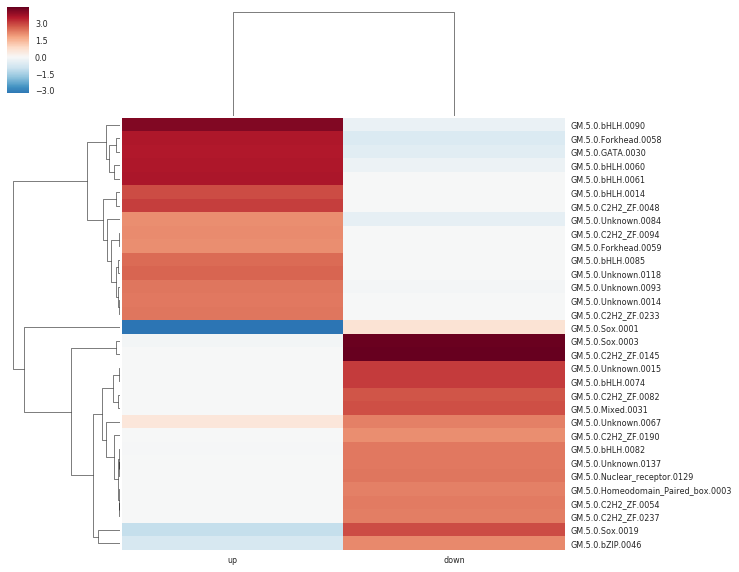

In [182]:
res_1 = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_1_1/final.out.csv", index_col=0)
res_2= pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_2_1/final.out.csv", index_col=0)
res_3 = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_3_1/final.out.csv", index_col=0)
res_1 = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_4_1/final.out.csv", index_col=0)
res_5 = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_5_1/final.out.csv", index_col=0)
res_back = np.mean(np.array([res_1["back"].values,res_2["back"].values,res_3["back"].values,res_4["back"].values,res_5["back"].values]),axis=0)
res_up = np.mean(np.array([res_1["up"].values,res_2["up"].values,res_3["up"].values,res_4["up"].values,res_5["up"].values]),axis=0)
res_down = np.mean(np.array([res_1["down"].values,res_2["down"].values,res_3["down"].values,res_4["down"].values,res_5["down"].values]),axis=0)
# res_back = np.mean(np.array([res_1["back"].values]),axis=0)
# res_up = np.mean(np.array([res_1["up"].values]),axis=0)
# res_down = np.mean(np.array([res_1["down"].values]),axis=0)



#"back":res_back,
res_ = pd.DataFrame({"up":res_up,"down":res_down}, index=res_1.index)
res_[np.any(abs(res_) >= 2, 1)]
sns.clustermap(res_[["up","down"]][np.any(abs(res_[["up","down"]]) >= 2, 1)],cmap="RdBu_r",center=0)
#res_[["up","down","back"]][np.any(abs(res_[["up","down","back"]]) >= 2, 1)]

,atac_down,atac_up
GM.5.0.Sox.0003,3.167982,0.000000
GM.5.0.Mixed.0004,0.000000,3.713981
GM.5.0.Homeodomain_POU.0004,2.502928,0.000000
GM.5.0.Homeodomain_POU.0005,2.135433,0.000000
GM.5.0.Homeodomain_POU.0007,4.418548,0.000000
GM.5.0.Mixed.0022,0.000000,2.215815
GM.5.0.Unknown.0006,3.485660,0.000000
GM.5.0.Mixed.0023,-0.140245,2.385478
GM.5.0.Sox.0018,3.282696,0.000000
GM.5.0.Mixed.0043,0.000000,2.161024


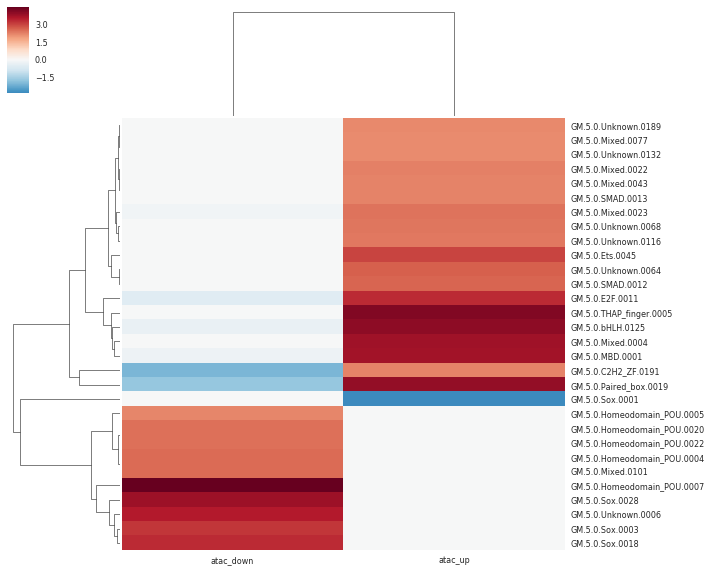

In [183]:
res_1_a = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_enh/final.out.csv", index_col=0)
#res_back = np.mean(np.array([res_1["back"].values]),axis=0)
# res_up = np.mean(np.array([res_1["up"].values]),axis=0)
# res_down = np.mean(np.array([res_1["down"].values]),axis=0)
res_enh_down = np.mean(np.array([res_1_a["atacDown"].values]),axis=0)
res_enh_up = np.mean(np.array([res_1_a["atacUP"].values]),axis=0)


#"back":res_back
res_a = pd.DataFrame({"atac_down":res_enh_down, "atac_up":res_enh_up}, index=res_1.index)
res_a[np.any(abs(res_a) >= 2, 1)]
sns.clustermap(res_a[["atac_down","atac_up"]][np.any(abs(res_a[["atac_down","atac_up"]]) >= 2, 1)],cmap="RdBu_r",center=0)
res_a[["atac_down","atac_up"]][np.any(res_a[["atac_down","atac_up"]] >= 2, 1)]



,up,down,atac_up,atac_down
GM.5.0.Mixed.0101,0.000000,0.928787,0.000000,2.517178
GM.5.0.Homeodomain_POU.0005,0.000000,0.019850,0.000000,2.135433
GM.5.0.Homeodomain_POU.0004,0.000000,0.082349,0.000000,2.502928
GM.5.0.Homeodomain_POU.0020,0.000000,0.000000,0.000000,2.431238
GM.5.0.Homeodomain_POU.0022,0.000000,0.068954,0.000000,2.417315
GM.5.0.Homeodomain_POU.0007,0.000000,0.000000,0.000000,4.418548
GM.5.0.Sox.0028,-0.377295,0.164876,-0.019934,3.748832
GM.5.0.Unknown.0006,0.000000,0.000000,0.000000,3.485660
GM.5.0.Sox.0018,0.000000,0.000000,0.000000,3.282696
GM.5.0.Sox.0003,-0.116753,4.380907,0.000000,3.167982


<Figure size 2400x1600 with 0 Axes>

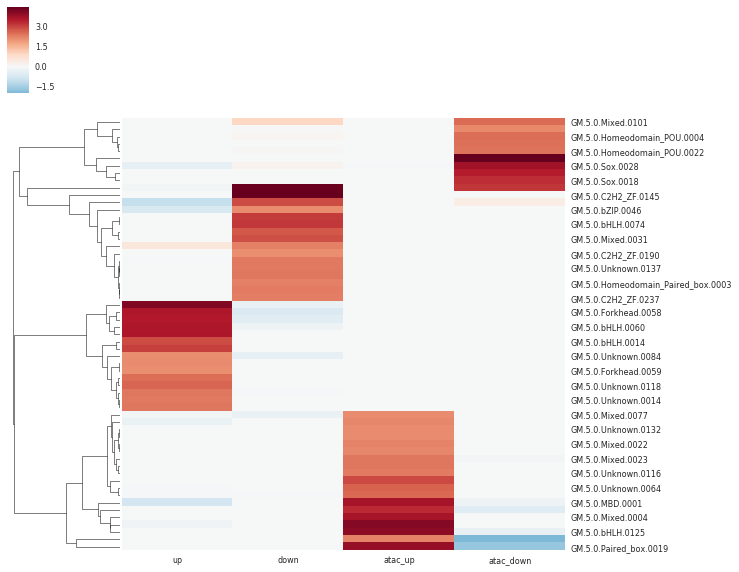

In [341]:
res_fin = res_.merge(res_a, how='right', right_index=True, left_index=True)
res_fin = res_fin[["up","down","atac_up","atac_down"]]
plt.figure(dpi=400)
ccc = sns.clustermap(res_fin[np.any(res_fin >= 2, 1)],cmap="RdBu_r",center=0, col_cluster=False)
ccc.data2d #res_fin[np.any(res_fin >= 2, 1)]



/package/anaconda3/bin/ipython:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 12000x6000 with 0 Axes>

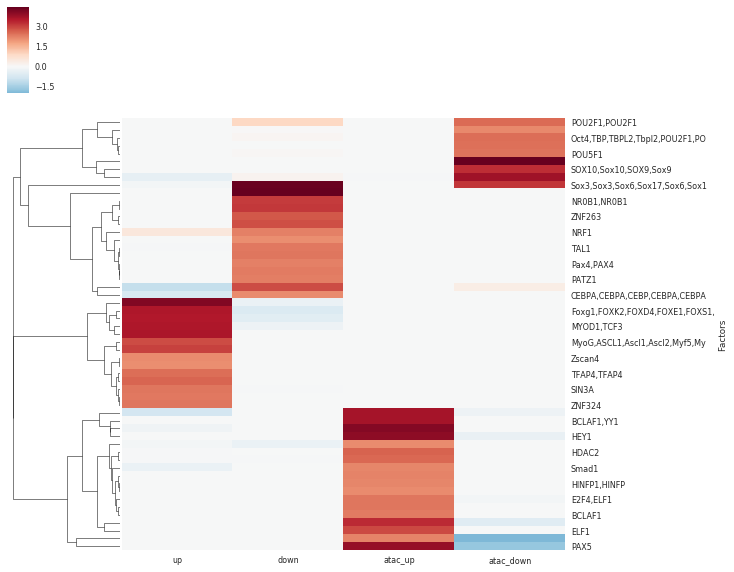

In [307]:
m2f = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_1/gimme.vertebrate.v5.0.motif2factors.txt", index_col=0)
m2f_ = [",".join(m2f.groupby("Motif").get_group(j)['Factor'].values) for j in m2f.index.unique()]
m2f = pd.Series(m2f_, name="Factors", index = m2f.index.unique()).to_frame()
m2f.Factors = m2f.Factors.str.slice(0,30)

df = res_fin.merge(m2f, right_index=True, left_index=True).set_index("Factors")
df = df[["up","down","atac_up","atac_down"]]
#df[["down","up"]][np.any(abs(df[["down","up"]]) >= 2, 1)]
plt.figure(dpi=400, figsize=(30,15))
cm = sns.clustermap(df[np.any(df >= 2, 1)],cmap="RdBu_r",center=0, col_cluster=False)
# cm.fig.subplots_adjust(right=0.5)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()

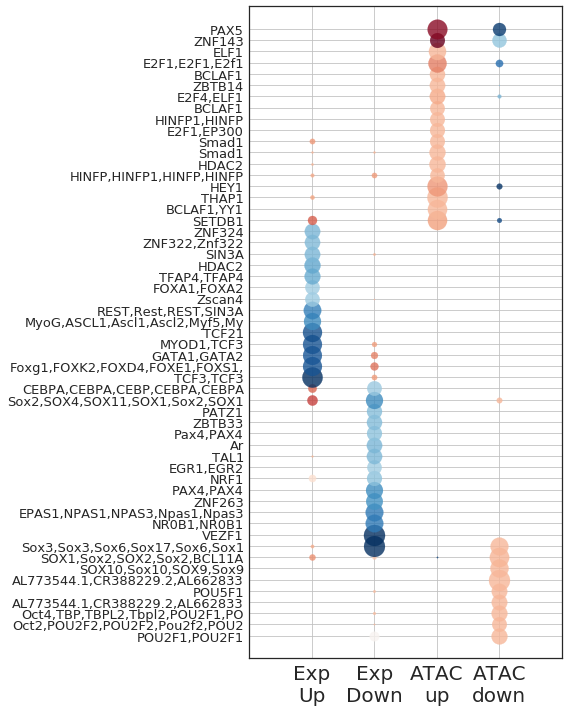

In [248]:
data = cm.data2d[np.any(cm.data2d >= 2, 1)]

plt.figure(figsize=(8,10))
plt.grid(color="silver")
plt.xticks(range(4),["Exp\nUp","Exp\nDown","ATAC\nup","ATAC\ndown"],size=20)
plt.yticks(range(data.shape[0]),cm.data2d.index, size=13)
plt.xlim(-1,4)
plt.ylim(-2,data.shape[0]+1)
norm = mcolors.Normalize(vmin=-2, vmax=4, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.RdBu)
col_map = pd.DataFrame()
col_map['up'] = cm.data2d['up'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map['down'] = cm.data2d['down'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map['atac_down'] = cm.data2d['atac_down'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map['atac_up'] = cm.data2d['atac_up'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))


# col_map
for i in range(cm.data2d.shape[1]):
    for j in range(cm.data2d.shape[0]):
        #print([i,j], cm.data2d.values[j,i])
        #print(np.fabs(cm.data2d.values[j,i]))
        plt.scatter([i], [j], s=np.fabs(cm.data2d.values[j,i])*100, color = col_map.values[j,i], zorder=3,alpha=0.8)
plt.tight_layout()      

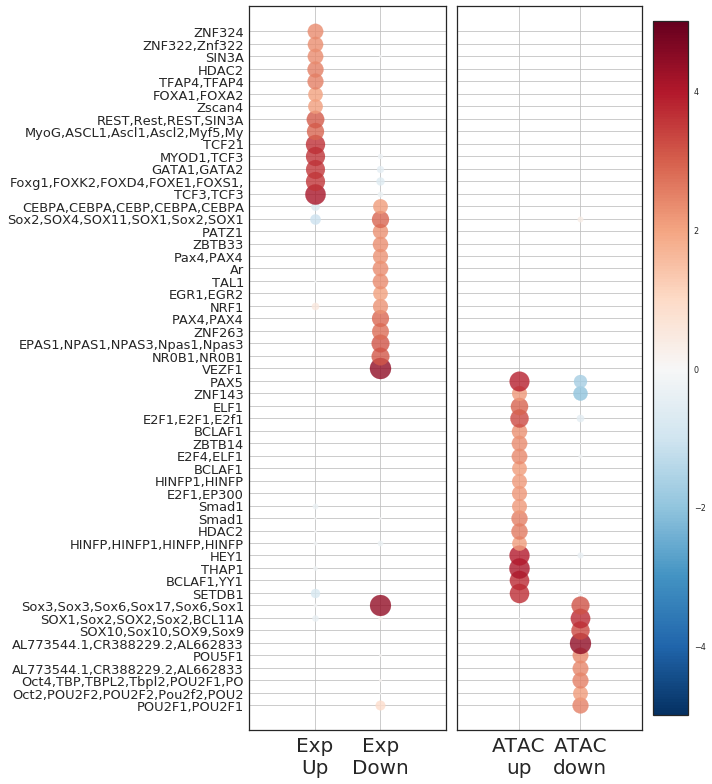

In [342]:
data = cm.data2d[np.any(cm.data2d >= 2, 1)]
data["factors"] = data.index
data.index = range(data.shape[0])
data = data.reindex(labels = list(data.index[:9])+list(data.index[37:])+list(data.index[9:37]), axis=0)
data.index = data["factors"]
data.drop(["factors"],axis='columns', inplace=True)
data

fig,ax = plt.subplots(1,2, figsize=(10,11), gridspec_kw = {'width_ratios':[1.7, 2]})
ax[0].grid(color="silver")

ax[0].set_xticks(range(2))
ax[0].set_xticklabels(["Exp\nUp","Exp\nDown"],size=20)

ax[0].set_yticks(range(data.shape[0]))
ax[0].set_yticklabels(data.index, size=13)
ax[0].set_xlim(-1,2)
ax[0].set_ylim(-2,data.shape[0]+1)
norm = mcolors.Normalize(vmin=-5, vmax=5, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.RdBu_r)
col_map = pd.DataFrame()
col_map['up'] = data['up'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map['down'] = data['down'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map['atac_up'] = data['atac_up'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map['atac_down'] = data['atac_down'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))


# col_map
for i in range(2):
    for j in range(data.shape[0]):
        #print([i,j], cm.data2d.values[j,i])
        #print(np.fabs(cm.data2d.values[j,i]))
        ax[0].scatter([i], [j], s=np.fabs(data.values[j,i])*100, color = col_map.values[j,i], zorder=3,alpha=0.8)
plt.tight_layout()   



ax[1].grid(color="silver")

ax[1].set_xticks(range(2))
ax[1].set_xticklabels(["ATAC\nup","ATAC\ndown"],size=20)

ax[1].set_yticks(range(data.shape[0]))
ax[1].set_yticklabels([], size=13)
ax[1].set_xlim(-1,2)
ax[1].set_ylim(-2,data.shape[0]+1)
# norm = mcolors.Normalize(vmin=-3, vmax=3, clip=True)
# mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.RdBu_r)
# col_map = pd.DataFrame()
# col_map['up'] = data['up'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
# col_map['down'] = data['down'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
# col_map['atac_down'] = data['atac_down'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
# col_map['atac_up'] = data['atac_up'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))


# col_map
for i in range(2):
    for j in range(cm.data2d[["atac_up","atac_down"]].shape[0]):
        #print([i,j], cm.data2d.values[j,i])
        #print(np.fabs(cm.data2d.values[j,i]))
        ax[1].scatter([i], [j], s=np.fabs(data[["atac_up","atac_down"]].values[j,i])*100, color = col_map[["atac_up","atac_down"]].values[j,i], zorder=3,alpha=0.8)
cbar=plt.colorbar(mapper)
plt.tight_layout()   

#"ATAC\nup","ATAC\ndown"
# plt.savefig("../FIGURES/Maelstrom_promoters_enhancers.pdf")

In [317]:
list(data.index[9:37])

['VEZF1',
 'NR0B1,NR0B1',
 'EPAS1,NPAS1,NPAS3,Npas1,Npas3',
 'ZNF263',
 'PAX4,PAX4',
 'NRF1',
 'EGR1,EGR2',
 'TAL1',
 'Ar',
 'Pax4,PAX4',
 'ZBTB33',
 'PATZ1',
 'Sox2,SOX4,SOX11,SOX1,Sox2,SOX1',
 'CEBPA,CEBPA,CEBP,CEBPA,CEBPA',
 'TCF3,TCF3',
 'Foxg1,FOXK2,FOXD4,FOXE1,FOXS1,',
 'GATA1,GATA2',
 'MYOD1,TCF3',
 'TCF21',
 'MyoG,ASCL1,Ascl1,Ascl2,Myf5,My',
 'REST,Rest,REST,SIN3A',
 'Zscan4',
 'FOXA1,FOXA2',
 'TFAP4,TFAP4',
 'HDAC2',
 'SIN3A',
 'ZNF322,Znf322',
 'ZNF324']

In [316]:
list(data.index[37:])

['SETDB1',
 'BCLAF1,YY1',
 'THAP1',
 'HEY1',
 'HINFP,HINFP1,HINFP,HINFP',
 'HDAC2',
 'Smad1',
 'Smad1',
 'E2F1,EP300',
 'HINFP1,HINFP',
 'BCLAF1',
 'E2F4,ELF1',
 'ZBTB14',
 'BCLAF1',
 'E2F1,E2F1,E2f1',
 'ELF1',
 'ZNF143',
 'PAX5']

In [311]:
list(data.index[:9])

['POU2F1,POU2F1',
 'Oct2,POU2F2,POU2F2,Pou2f2,POU2',
 'Oct4,TBP,TBPL2,Tbpl2,POU2F1,PO',
 'AL773544.1,CR388229.2,AL662833',
 'POU5F1',
 'AL773544.1,CR388229.2,AL662833',
 'SOX10,Sox10,SOX9,Sox9',
 'SOX1,Sox2,SOX2,Sox2,BCL11A',
 'Sox3,Sox3,Sox6,Sox17,Sox6,Sox1']

In [262]:
col_map

,up,down,atac_up,atac_down
Factors,,,,
"POU2F1,POU2F1",#f7f6f6,#f8bda1,#f7f6f6,#a21328
"Oct2,POU2F2,POU2F2,Pou2f2,POU2",#f7f6f6,#f7f6f6,#f7f6f6,#c13639
"Oct4,TBP,TBPL2,Tbpl2,POU2F1,PO",#f7f6f6,#f8f3f0,#f7f6f6,#a51429
"AL773544.1,CR388229.2,AL662833",#f7f6f6,#f7f6f6,#f7f6f6,#ae172a
POU5F1,#f7f6f6,#f8f4f2,#f7f6f6,#ae172a
"AL773544.1,CR388229.2,AL662833",#f7f6f6,#f7f6f6,#f7f6f6,#67001f
"SOX10,Sox10,SOX9,Sox9",#f7f6f6,#f7f6f6,#f7f6f6,#67001f
"SOX1,Sox2,SOX2,Sox2,BCL11A",#deebf2,#f9efe9,#f6f7f7,#67001f
"Sox3,Sox3,Sox6,Sox17,Sox6,Sox1",#f0f4f6,#67001f,#f7f6f6,#67001f


/package/anaconda3/bin/ipython:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 12000x6000 with 0 Axes>

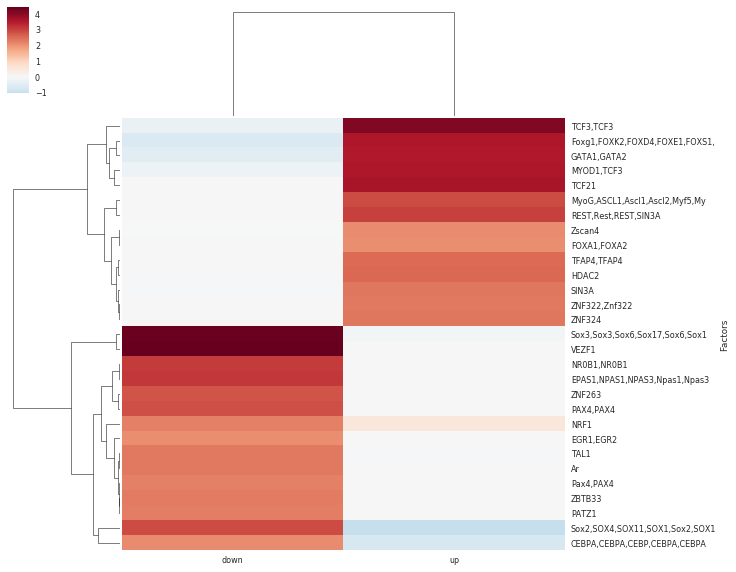

In [177]:
m2f = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_1/gimme.vertebrate.v5.0.motif2factors.txt", index_col=0)
m2f_ = [",".join(m2f.groupby("Motif").get_group(j)['Factor'].values) for j in m2f.index.unique()]
m2f = pd.Series(m2f_, name="Factors", index = m2f.index.unique()).to_frame()
m2f.Factors = m2f.Factors.str.slice(0,30)

df = res_.merge(m2f, right_index=True, left_index=True).set_index("Factors")
df[["down","up"]][np.any(abs(df[["down","up"]]) >= 2, 1)]
plt.figure(dpi=400, figsize=(30,15))
cm = sns.clustermap(df[["down","up"]][np.any(df[["down","up"]] >= 2, 1)],cmap="RdBu_r",center=0)
# cm.fig.subplots_adjust(right=0.5)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()

In [157]:
m2f = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_1/gimme.vertebrate.v5.0.motif2factors.txt", index_col=0)
m2f_ = [",".join(m2f.groupby("Motif").get_group(j)['Factor'].values) for j in m2f.index.unique()]
m2f = pd.Series(m2f_, name="Factors", index = m2f.index.unique()).to_frame()
m2f.Factors = m2f.Factors.str.slice(0,30)

df = res_.merge(m2f, right_index=True, left_index=True).set_index("Factors")
df[["atac_down","atac_up"]][np.any(abs(df[["atac_down","atac_up"]]) >= 2, 1)]
plt.figure(dpi=400, figsize=(30,15))
cm = sns.clustermap(df[["atac_down","atac_up"]][np.any(df[["atac_down","atac_up"]] >= 2, 1)],cmap="RdBu_r",center=0)
# cm.fig.subplots_adjust(right=0.5)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()

KeyError: "None of [Index(['atac_down', 'atac_up'], dtype='object')] are in the [columns]"

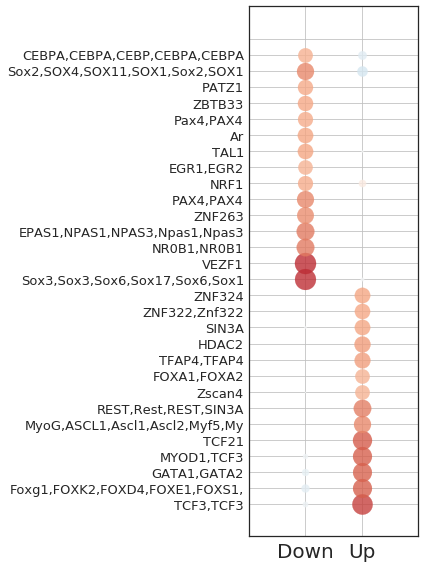

In [179]:
data = df[["down","up",]][np.any(abs(df[["down","up"]]) >= 2, 1)]

plt.figure(figsize=(6,8))
plt.grid(color="silver")
plt.xticks(range(2),["Down","Up"],size=20)
plt.yticks(range(data.shape[0]),cm.data2d.index, size=13)
plt.xlim(-1,2)
plt.ylim(-2,data.shape[0]+1)
norm = mcolors.Normalize(vmin=-6, vmax=6, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.RdBu_r)
col_map = pd.DataFrame()
col_map['down'] = cm.data2d['down'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map['up'] = cm.data2d['up'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))

col_map
for i in range(cm.data2d.shape[1]):
    for j in range(cm.data2d.shape[0]):
        #print([i,j], cm.data2d.values[j,i])
        #print(np.fabs(cm.data2d.values[j,i]))
        plt.scatter([i], [j], s=np.fabs(cm.data2d.values[j,i])*100, color = col_map.values[j,i], zorder=3,alpha=0.8)
plt.tight_layout()      
# plt.savefig("../FIGURES/Motif_activity_on_Promoters_NPC48h.pdf")

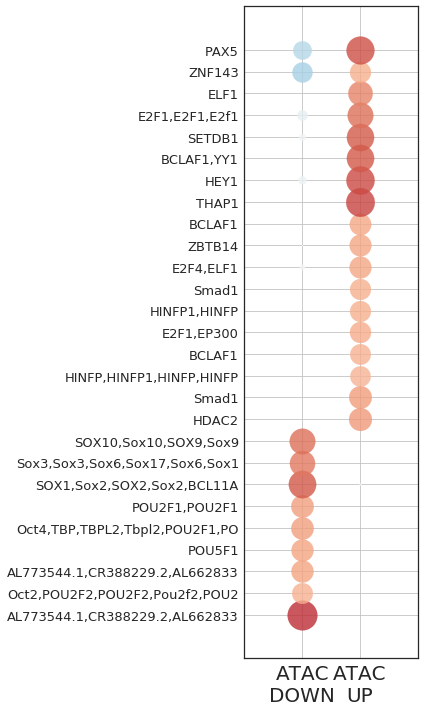

In [115]:
data = df[["atac_down","atac_up"]][np.any(df[["atac_down","atac_up"]] >= 2, 1)]
data
plt.figure(figsize=(6,10))
plt.grid(color="silver")
plt.xticks(range(2),["ATAC\nDOWN","ATAC\nUP"],size=20)
plt.yticks(range(data.shape[0]),cm.data2d.index, size=13)
plt.xlim(-1,2)
plt.ylim(-2,data.shape[0]+1)
norm = mcolors.Normalize(vmin=-6, vmax=6, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.RdBu_r)
col_map = pd.DataFrame()
col_map['atac_down'] = cm.data2d['atac_down'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map['atac_up'] = cm.data2d['atac_up'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))

col_map
for i in range(cm.data2d.shape[1]):
    for j in range(cm.data2d.shape[0]):
#         print([i,j], cm.data2d.values[j,i])
#         print(np.fabs(cm.data2d.values[j,i]))
        plt.scatter([i], [j], s=np.fabs(cm.data2d.values[j,i])*200, color = col_map.values[j,i],zorder=3,alpha=0.8)

col_map
plt.tight_layout()  
#

In [90]:
cm.data2d.min().min()

-2.0144864689903117

In [86]:
%%bash

source activate gimme

gimme motifs -n ../INTERMEDIATE_FILES/MotifEnrich_Promoters_UpGenes_NPC48h \
-g /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa -N 20 -f 0.4 ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC.bed

/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(